In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, ifft2
from numpy.linalg import matrix_rank
import statistics
import math
from skimage import color, data, restoration
from scipy.signal import gaussian, convolve2d
from scipy.signal import convolve2d as conv2

In [2]:
# Input
image=cv2.imread('lowRes.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [3]:
def show(ori,new):
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(1,2,1)
    plt.imshow(ori)
    plt.axis('off')
    plt.title("Original")
    fig.add_subplot(1,2,2)
    plt.imshow(new)
    plt.axis('off')
    plt.title("Modified")

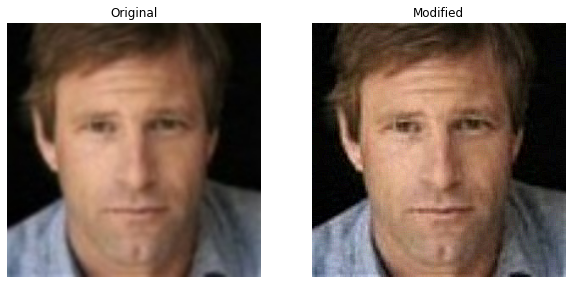

In [4]:
newImage=image.copy()

# Unsharp
#blurred=cv2.GaussianBlur(image,(5,5),0)
#newImage=cv2.addWeighted(image,2.2,blurred,-1.0, 0)
#show(image,newImage)

# Sharpen
laplacian=np.array([[-1,-1,-1],
                    [-1,9,-1],
                    [-1,-1,-1]])
newImage=cv2.filter2D(newImage,-1,laplacian)

show(image,newImage)